# Статистика, прикладной поток
## Практическое задание 3

В данном задании вы найдете оценки максимального правдоподобия по реальным данным для некоторых вероятностных моделей, изучите bias-variance разложение, а также исследуете оценки в схеме Бернулли.

**Правила:**

* Дедлайн **20 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов **O2**
* Задача 2a -  5 баллов **O2**
* Задача 2b -  10 баллов **O2**
* Задача 3 -  15 баллов **O2**
* Задача 4 -  15 баллов **O3**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

__________________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine и загрузите их с помощью библиотеки pandas.

In [225]:
wine =  pd.read_csv("wine.data")

Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** Оценка макс. правдоподобия: $a = \overline{X}, \Sigma = \frac{1}{n}\sum_{i=1}^{n}(X_i - \overline{X})(X_i - \overline{X})^T$ 

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue".
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

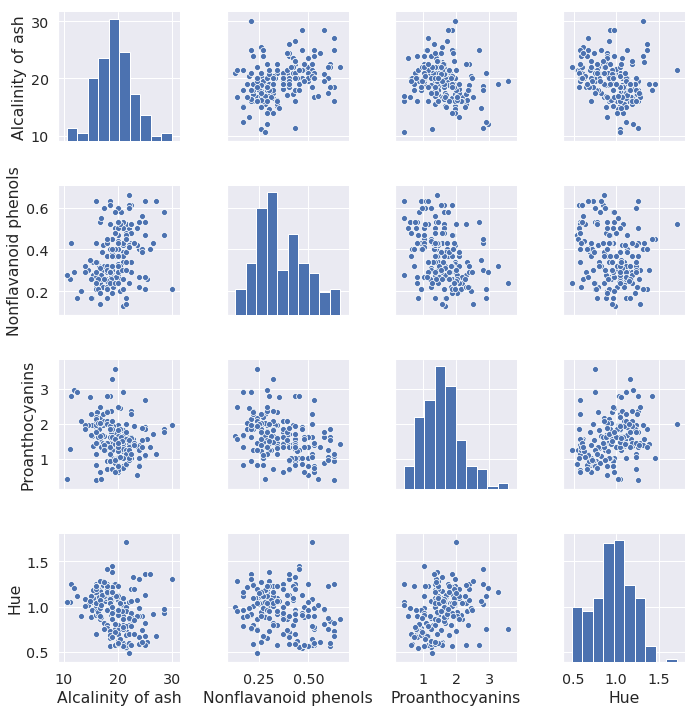

In [226]:
wine = wine[["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]]

sns.pairplot(wine)

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [227]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    
    return sample.mean(axis=0)

In [228]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    mean = sample.mean(axis=0)
    return np.einsum("...i,...j->...ij", sample - mean, sample - mean).mean(axis=0)

In [230]:
mu = mle_for_mean(wine.values)
sigma = mle_for_covariance_matrix(wine.values)
# print(mu, sigma)

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки.

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

In [181]:

def get_plot_gauss(index, sample, mu, sigma, label):
    
    min_sam = sample.min(axis=0)
    max_sam = sample.max(axis=0)
    X, Y =np.mgrid[min_sam[0] - 0.5:max_sam[0] + 0.5:((max_sam-min_sam)[0] + 1)/1000, 
                min_sam[1] - 0.5:max_sam[1] + 0.5:((max_sam-min_sam)[0] + 1)/1000]
    
    mul_normal = sps.multivariate_normal(mean=mu, cov=sigma)
    density = mul_normal.pdf(np.dstack((X, Y)))

    plt.subplot(3,2, index)
    
    plt.xlabel(label[0])
    plt.ylabel(label[1])
    
    plt.xlim((min_sam[0] - 0.1, max_sam[0] + 0.1))
    plt.ylim((min_sam[1] - 0.1, max_sam[1] + 0.1))
    
    plt.pcolormesh(X, Y, density, cmap='Oranges')
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='случайные векторы')
    CS = plt.contour(X, Y, density)
    plt.clabel(CS)
        

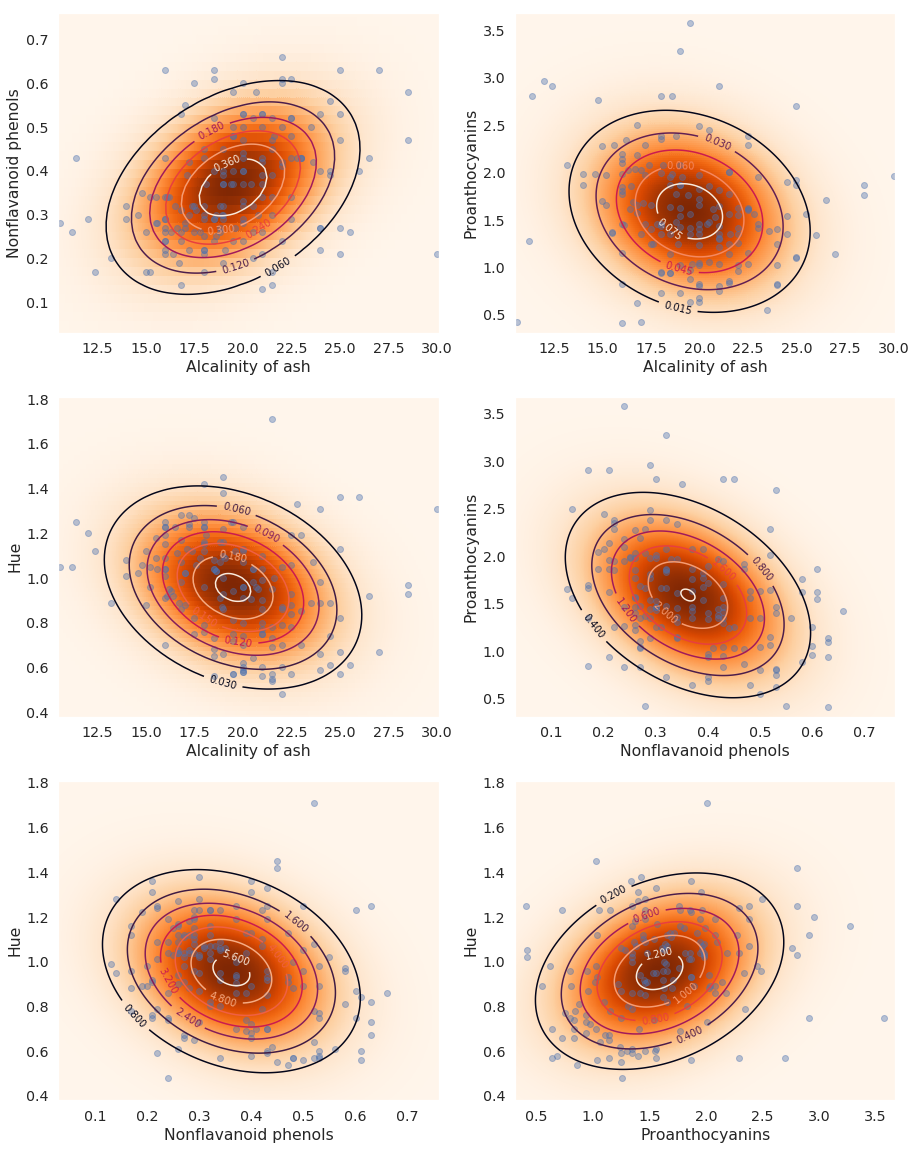

In [182]:

X, Y = np.mgrid[:4, :4]
ind = 0

plt.figure(figsize=(15,20))
for i, j in zip(X.ravel(), Y.ravel()):
    if (i < j):
        ind += 1
        get_plot_gauss(ind, wine.values[:, [i,j]], mu[[i,j]], 
                               sigma[[[i],[j]],[i,j]], wine.columns[[i,j]])     
plt.show()


**Выводы:** Мы можем видеть, что многомерное распределение с параметрами, полученные методом максимального правдоподобия довольно хорошо описывает распределение данной выборки. То есть мы действительно можем сказать что наше выборка имеет многомерное распределение.

__________________
### Задача 2.
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I (x \geq 0),$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

*Выборка:*  Создайте выборку по значениям среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех).  Выборку можно получить <a href="http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind_2018.html">отсюда</a>, используя скрипт `script.py`. Откройте командную строку в той же папке, запустите скрипт (`python3 script.py`) и следуйте инструкциям; на вопрос `Pick data type:` надо ответить `5`, чтобы выбрать данные по ветру. В полученном csv-файле надо выбрать данные (столбец `Mean`) за некоторый промежуток времени.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [2]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

In [3]:
sample = pd.read_csv("windNovgorod.csv")
sample = sample[sample.Year >= 2000][sample.Year <= 2003].Mean
sample = sample.values

In [5]:
# Lambda[cool_argmax(pdfs.sum(axis=-1))]

begin_k = 0.1
end_k = 1e4

begin_l = 0.1
end_l = 1e4

while ( np.sqrt((end_l - begin_l)**2 + (end_k - begin_k)**2) > 2*1e-5 ):
    
    step_l = (end_l-begin_l)/100.0
    step_k = (end_k-begin_k)/100.0
    
    Lambda, K = np.mgrid[begin_l:end_l:step_l, 
                         begin_k:end_k:step_k]
    pdfs = sps.weibull_min(scale=Lambda[:,:,np.newaxis], 
                c=K[:,:,np.newaxis]).logpdf(sample[np.newaxis, :]).sum(axis=-1)
    l = Lambda[cool_argmax(pdfs)]
    k = K[cool_argmax(pdfs)]
    
    begin_l = l - step_l if l > step_l else 0.1
    end_l = l + step_l if ((l + step_l) < 1e4) else 1e4
    
    begin_k = k - step_k if k > step_k else 0.1
    end_k = k + step_k if ((k + step_k) < 1e4) else 1e4

    
mle_k = begin_k
mle_l = begin_l

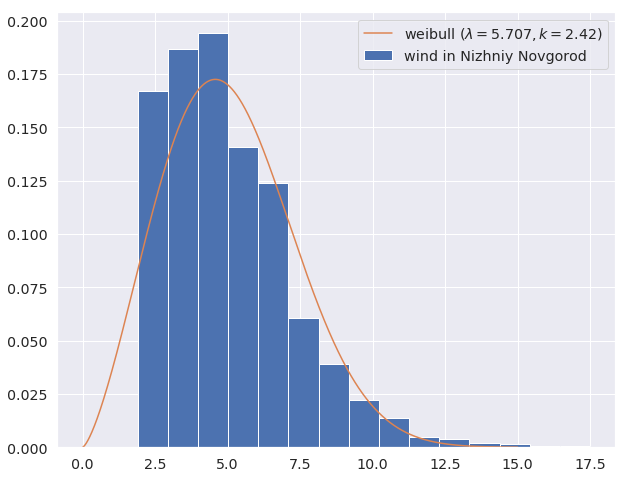

In [120]:
grid = np.linspace(0.01, 15, 1000)

plt.figure(figsize=(10, 8))

plt.hist(sample, bins=15, normed=True, label='wind in Nizhniy Novgorod')
plt.plot(grid, sps.weibull_min(c=mle_k, scale=mle_l).pdf(grid), 
    label=r'weibull $(\lambda = {}, k = {})$'.format(round(mle_l, 3),
                                                        round(mle_k, 3)))

plt.legend()

plt.show()

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия (все частные производные в точке экстремума логарифмической функции правдоподобия должны быть равны $0$). Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона, рассказанного в рамках курса методов оптимизации, и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

$$\frac{\partial l_{X}(\theta)}{\partial k} = \frac{n}{k} + n\overline{ln(X)} - n*ln(\lambda) - 
   \sum (\frac{x_i}{\lambda})^k*(ln(x_i)-ln(\lambda)) = 0$$
   
$$\frac{\partial l_{X}(\theta)}{\partial \lambda} = -\frac{kn}{\lambda} + k\frac{1}{\lambda^{k+1}}\sum x_i^k = 0$$   

**Решение:**

In [142]:
x = sample
def f(k):
    return 1/k + np.log(sample).mean() - (x**k*np.log(x)).sum()/((x**k).sum())

def deriv_f(k):
    a1 = ((x**k*np.log(x)).sum()/(x**k).sum())**2
    return -1/k**2 + a1 - (x**k*(np.log(x))**2).sum()/(x**k).sum()

k0 = 6
k1 = 0
while True:
    k1 = k0 - f(k0)/deriv_f(k0)
    if (abs(k1 - k0) < 1e-6):
        break
    k0 = k1

newton_k = k1
newton_l = ((x**newton_k).mean()**(1/newton_k))


print("---Newton---")
print('k : ', newton_k)
print(r'lambda : $', newton_l)

---Newton---
k :  2.4198074628786594
lambda : $ 5.706832097706206


**Вывод:** Мы видим, что приближение оценки максимального правдобия методом поиска по сетке, и с помошью метода Ньютона - оба дают хорошее приближениею Но, тем не менее,  у каждого метода есть свои плюсы и минусы. У поиска по сетке основной минус в том, что работает он относительно долго, а также он затратен по памяти, так как нужно в цикле постоянно создавать сетку, и проходить по ней, но он дает точный результат. Метод Ньютона, гораздо более быстр, но он существенно зависит от выбора начальной точки, так как может найти не те корни уравнения правдоподобия (то есть не максимум). Например в данной задаче там был еще отрицательный корень. 

Поэтому, вполне можно действовать например таким образом : находим поиском по сетке какую то окрестность, где лежит наш максимум правдоподобия, а затем ищем более быстрым методом Ньютона начиная с точки из этой окрестности.

__________________
### Задача 3.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 

$\textrm{bias}^2_{\widehat{\theta}} (\theta) = \theta^2(\frac{cn}{n+1} - 1)^2 ;\\
\textrm{var}_{\widehat{\theta}} (\theta) = c^2(\frac{n}{n+2} - (\frac{n}{n+1})^2)\theta^2
$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое $c$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

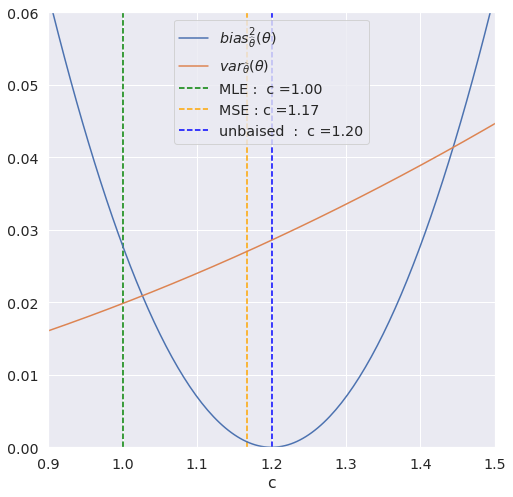

In [4]:
n=5
theta=1
grid = np.linspace(-20, 20, 10000)

def square_bias(grid):
    global theta, n
    return theta*theta*(grid*n/(n+1) - 1)**2

def var(grid):
    global theta, n
    return grid**2*theta*theta*(n/(n+2) - (n/(n+1))**2)


plt.figure(figsize=(8,8))

plt.xlabel("c")
plt.ylabel("")

plt.xlim((0.9,1.5))
plt.ylim((0,0.06))

plt.plot(grid, square_bias(grid), label=r"$bias^2_{\widehat{\theta}} (\theta)$")
plt.plot(grid, var(grid), label=r"$var_{\widehat{\theta}} (\theta)$")

plt.vlines(1, 0, 2, color='green', linestyles='--',label='MLE :  c =%.2f'%(1))
plt.vlines((n+2)/(n+1), 0, 2, color='orange',linestyles='--',
                                                   label='MSE : c =%.2f'%((n+2.0)/(n+1)))
plt.vlines((n+1)/n, 0, 2, color='blue', linestyles='--',
                                                   label='unbaised  :  c =%.2f'%((n+1)/n))

plt.grid(linestyle='-')
plt.legend()
plt.show()

**Вывод: ** 
при $c=1$ -  ОМП, при $c = \frac{n+1}{n}$ - несмещенная оценка, при $c=\frac{n+2}{n+1}$ - лучшая в Среднеквадратичном подходе.

Получается, что у несмещ. оценки параметр $c$ больше всего, чуть меньше у MSE, и еще меньше у MLE. Здесь видно, что у MSE смещение совсем небольшое, гораздо большее смещение у ОМП и смещение будет расти с ростом $n$. Но зато у ОМП существенно меньший разброс. 

*b)* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 
$\textrm{bias}^2_{\widehat{\theta}} (\theta) = \sigma^4(\frac{n-1}{c} - 1)^2 ;\\
\textrm{var}_{\widehat{\theta}} (\theta) = \frac{\sigma^4}{c^2}2(n-1)
$

Повторите исследование, аналогичное пункту *a)* для $\sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Решение: **

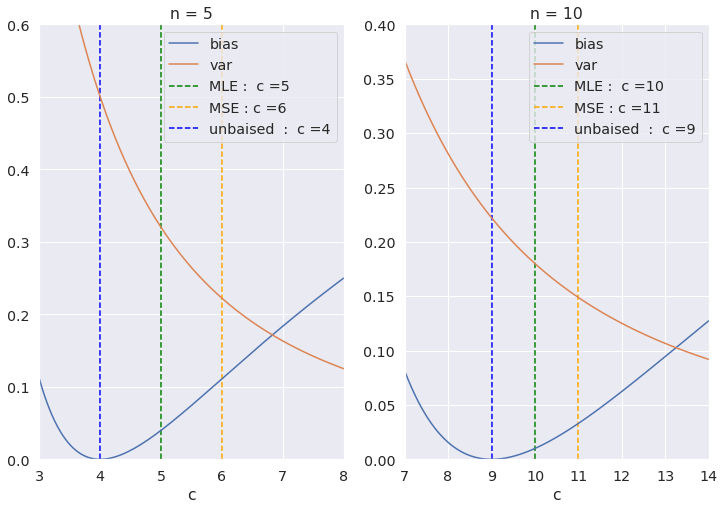

In [5]:
n=5 

grid = np.linspace(0, 15, 10000)


def sq_bias_b(grid, n):
    return ((n-1)/grid - 1)**2


def var_b(grid, n):
    return 2*(n-1)/grid**2

def get_plot(index, n, xlim, ylim):
    plt.subplot(1,2,index)
    
    plt.title("n = %d" % (n))
    
    plt.ylim(ylim)
    plt.xlim(xlim)
    
    plt.xlabel("c")
    
    plt.plot(grid, sq_bias_b(grid, n), label='bias')
    plt.plot(grid, var_b(grid, n), label='var')
    
    plt.vlines(n, 0, 2, 'green', linestyles='--',label='MLE :  c =%d'%(n))
    plt.vlines((n+1), 0, 2, 'orange',linestyles='--', label='MSE : c =%d'%((n+1)))
    plt.vlines((n-1), 0, 2, 'blue', linestyles='--',label='unbaised  :  c =%d'%(n-1))
    
    plt.grid(linestyle='-')
    plt.legend()
    
plt.figure(figsize=(12,8))

get_plot(1,5, xlim=(3,8),ylim=(0,0.6))
get_plot(2,10, xlim=(7,14),ylim=(0,0.4))

plt.show()

**Вывод:** при $c=n$ -  ОМП, при $c = n-1$ - несмещенная оценка, при $c=n+1$ - лучшая в Среднеквадратичном подходе.

Здесь видно, что у несмещ. оценки данный параметр $с$ меньше всего, потом идет MLE, а еще больше у MSE. Здесь видно, что несмотря на то, что у MSE смещение больше чем у MLE, тем не менее, засчет большего смещения она добивается уменьшения дисперсии, что позволяет ей быть лучшей в с/к подходе.

*c)* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $Exp (\theta)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{c}{X_1 + \dots + X_n}, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 
$\textrm{bias}^2_{\widehat{\theta}} (\theta) = \theta^2(\frac{c}{n-1} - 1)^2;\\
\textrm{var}_{\widehat{\theta}} (\theta) = \frac{c^2\theta^2}{(n-1)^2(n-2)}
$

Повторите исследование, аналогичное пункту *c)* для $\theta = 1$ и $n = 7$. Не забудьте сделать выводы.

**Решение: **

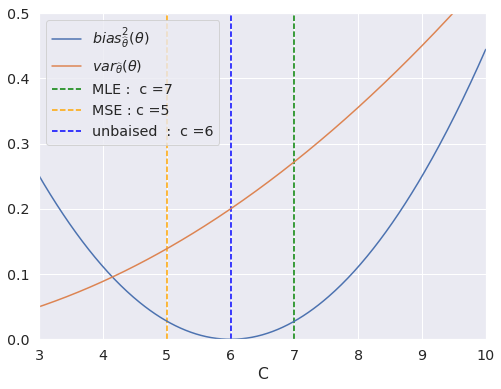

In [6]:
n = 7
grid = np.linspace(-10,10,1000)

def sq_bias_c(grid, n):
    return (grid/(n-1)-1)**2

def var_c(grid, n):
    return grid**2/((n-2)*(n-1)**2)

plt.figure(figsize=(8,6))

plt.xlabel('C')

plt.xlim((3,10))
plt.ylim((0,0.5))

plt.plot(grid, sq_bias_c(grid, 7), label=r"$bias^2_{\widehat{\theta}} (\theta)$")
plt.plot(grid, var_c(grid, 7), label=r"$var_{\widehat{\theta}} (\theta)$")

plt.vlines(n, 0, 2, color='green', linestyles='--',label='MLE :  c =%d'%(n))
plt.vlines(n-2, 0, 2, color='orange',linestyles='--',label='MSE : c =%d'%(n-2))
plt.vlines(n-1, 0, 2, color='blue', linestyles='--',label='unbaised  :  c =%d'%(n-1))

plt.legend()

plt.show()

**Вывод: ** при c=n -  ОМП, при c = n-1 - несмещенная оценка, при c=n-2 - лучшая в Среднеквадратичном подходе
    Здесь видно, что c в  с/к подходе и с для ОМП  находятся на одинаковом смещении от несмещенной с, по обе стороны, причем, у ОМП разброс получается существенно больше, чем у MSE и несмещенной.

Сделайте вывод по результатам пунктов *a)*, *b)*, *c)*.

**Общий вывод:** bias-variance разложение, а особенно визуализация может дать хорошее представление о том, какая оценка, лучше а какая хуже в том или ином случае, а именно позволяет наглядно сравнить разбросы этих оценок и смещение. Причем какой то тенденции в оценках не наблюдается. То есть нельзя сказать что у какой-то из этих оценок - у ОМП, у лучшей в с/к подходе или несмещенной, всегда меньше разброс или смещение меньше, чем у какой-то другой из этих трех. В частности, нередко  MSE смещена больше чем та же ОМП, или у ОМП меньше разброс и т.д. Но можно сказать, что так как MSE выбирает лучшую в с/к подходе часто допускает смещение, чтобы выиграть в разбросе и тем самым получить более оптимальную. 

__________________
### Задача 4.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$.

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.

В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$

Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

*1.* Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Вычислите долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

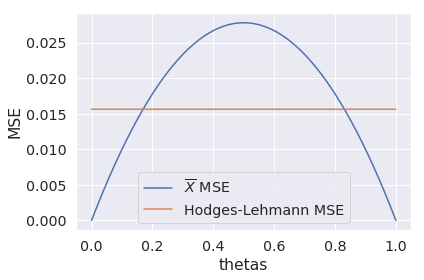

0.6614378277661477


In [262]:
thetas = np.linspace(0, 1, 10000)


def sam_mean_MSE(thetas):
    return thetas*(1-thetas)/9

def HL_MSE():
    return 1/64

plt.figure()

plt.xlabel("thetas")
plt.ylabel("MSE")

plt.plot(thetas, sam_mean_MSE(thetas), label=r'$\overline{X}$ MSE')

plt.plot(thetas, HL_MSE() * np.ones(len(thetas)), label=r'Hodges-Lehmann MSE')

plt.legend()

plt.show()


print(7**(0.5)/4)

**Ответ:** доля таких $\theta$, что $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$  равна 0.6614 

*2.* Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение: **

In [273]:
thetas = sps.uniform(loc=0, scale=1).rvs(1000)

sample = sps.bernoulli(p=thetas.reshape(-1,1)).rvs((len(thetas),9))

sample_mean = sample.mean(axis=1)

HL_estimator = sample_mean + 0.25*(0.5 - sample_mean)

print("Доля случаев, когда Ходжес-Леман лучше",
      len(HL_estimator[np.abs(HL_estimator - thetas) <
                           np.abs(sample_mean - thetas)])/1000)

Доля случаев, когда Ходжес-Леман лучше 0.514


**Вывод:** Результат не очень похож на ответ в прошлом пункте. Это происходит что мы используем различные подходы в сравнении оценок в 1ом и 2ом пунктах. В первом мы считаем долю таких $\widetilde{\theta}$, что MSE у нее меньше чем у $\overline{X}$, а во втором долю ответов, на котором  у нас $\widetilde{\theta}$ ближе к $\theta$, с учетом того что $\theta $ из $U[0,1]$

*3.*  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрично относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.

Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ оказажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода прямоугольников. Сделайте выводы.

**Решение:**

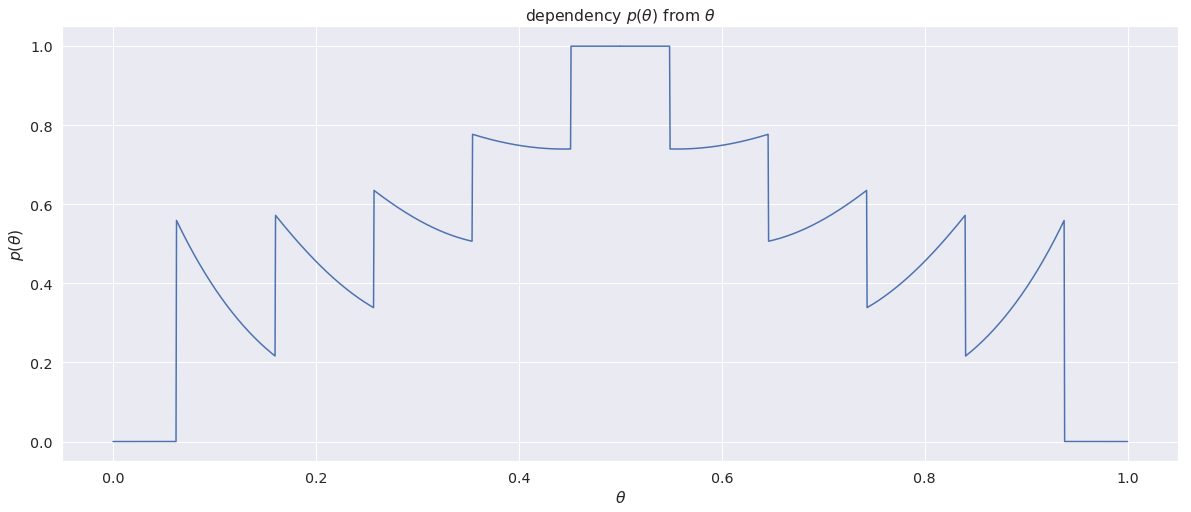

In [307]:
thetas = np.linspace(0,0.5,1000) 

def p(thetas):
    return 1 - sps.binom(n=9, p=thetas).cdf(4.5) + sps.binom(n=9, 
                                                p=thetas).cdf((16*thetas-1)*9/14)
    

plt.figure(figsize=(20,8))

plt.title(r"dependency $p(\theta)$ from $\theta$")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")

plt.plot(thetas, p(thetas), color='b')
plt.plot(thetas + 1/2, p(1/2-thetas), color='b')

plt.show()



In [301]:
class Integrator: 
    @staticmethod
    def integrate(f, low, high, n, method="rectangle"):
        """Вычисление интеграла.
        f - функция многих переменных, на вход принимает вектор;
        low - нижние границы (в том же порядке, в котором 
                              функция принимает аргументы);
        high - верхние границы (аналогично);
        n - максимальное число вызовов функции f;
        method - метод ("rectangle" или "monte_carlo", 
                            см. Integrator.methods);
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n = int(n)

        return Integrator.methods[method](f, low, high, n)
    
    def integrate_monte_carlo(f, low, high, n):
        """Метод монте-карло"""
        
        # случайные точки, в которых будем вычислять функцию
        multi_unif_rvs = np.vectorize(lambda loc, scale, size: sps.uniform(loc, 
                                    scale).rvs(size), signature='(),(),()->(m)')
        
        f_vectorized = np.vectorize(f, signature='(n)->()')
        
        dots = multi_unif_rvs(low, high-low, n).T
        # вычисление функции в случайных точках
        return (high-low).prod()*f_vectorized(dots).mean()
    
    
    def integrate_rectangle(f, low, high, n):
        """Метод прямоугольников"""
        
        # Если хотите - стирайте всё и пишите по-своему
        
        # число точек для каждой координаты
        n_for_one_dim = int(n**(1./len(low)))
        # разбиения отрезков интегрирования на равные отрезки
        vec_get_segment = np.vectorize(lambda low, high,
                        n: np.linspace(low, high, n), signature='(),(),()->(n)')
        #там и концы отрезков, и их середины
        ranges =  vec_get_segment(low, high, 2*n_for_one_dim+1)
        # вычисление центров этих разбиений
        ranges_of_centers = ranges[:, 1::2]
        # получение всех точек сетки через вызов np.meshgrid
        centers = np.array(np.meshgrid(*ranges_of_centers)).reshape(len(low), -1).T
        # длины отрезков по каждой координате
        block_lengths = (high - low) / float(n_for_one_dim)
        # вычисление значение функции в точках сетки
        
        f_vectorized = np.vectorize(f, signature='(n)->()')
        
        f_values = f_vectorized(centers)

        return (f_values*block_lengths.prod()).sum()
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }    

In [323]:
p_ = 2*Integrator.integrate(p,[0],[0.5],n=200)
print("integral = ", p_)

integral =  0.5067705471098889


**Ответ:** $p_{*} \approx \frac{1}{2}$, то есть примерно половина

**Вывод**: В этом случае видно, что данный подход в сравнении оценок очень похож на Байесовский, так как у нас есть распределение на параметре и мы считаем матожидание по этому распределению (в данном случае распределение - равномерное и матож- это просто интеграл), а фунцией риска у нас выступила наша посчитанная $p(\theta)$. 

Здесь видно, что Байесовский подход - это довольно естественный подход сравнения оценок, который следует из интуиции. 

*4.* Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

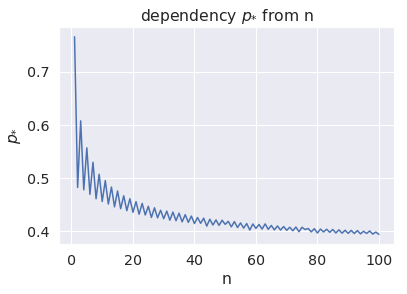

In [331]:
def p(thetas,n,d):
        return 1 - sps.binom(n=n, p=thetas).cdf(n/2.0) + sps.binom(n=n, 
                                        p=thetas).cdf(n*(thetas-d)/(1-2*d))
     
    
def p_(n):
    global thetas
    d = 1/(4*(1+n**(0.5)))
    return 2*Integrator.integrate(lambda t : p(t,n,d),[0],[0.5],200)
    
    
plt.figure()

plt.title("dependency $p_{*}$ from n")

plt.xlabel("n")
plt.ylabel("$p_{*}$")
plt.plot(np.linspace(1,100,100), [p_(i) for i in range(1,101)])

plt.show()

**Ответ:** С ростом $n$-размера выбрки  $p_{*}$ сходится к нулю. То есть это значит, что при небольших $n$ оценка $\widetilde{\theta}$ чаще получается ближе к $\theta$, чем $\overline{X}$, но с ростом $n$ ситуация меняется, и где-то при $n > 10$ уже  $p_{*}$ меньше половины, то есть чаще $\overline{X}$ оказывается ближе к $\theta$, чем оценка Ходжеса-Лемана, причем все чаще и чаще с ростом $n$. 